In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv("cleaned_df.csv")

In [43]:
cols = ['Severity', 'Side', 'City', 'County', 'State', 'Timezone', 
'Sunrise_Sunset','day','month','year','hour']

In [22]:
df['Start_Time']= pd.to_datetime(df['Start_Time'])

In [25]:
df['day'] = df['Start_Time'].dt.day
df['month'] = df['Start_Time'].dt.month
df['year'] = df['Start_Time'].dt.year
df['hour'] = df['Start_Time'].dt.hour

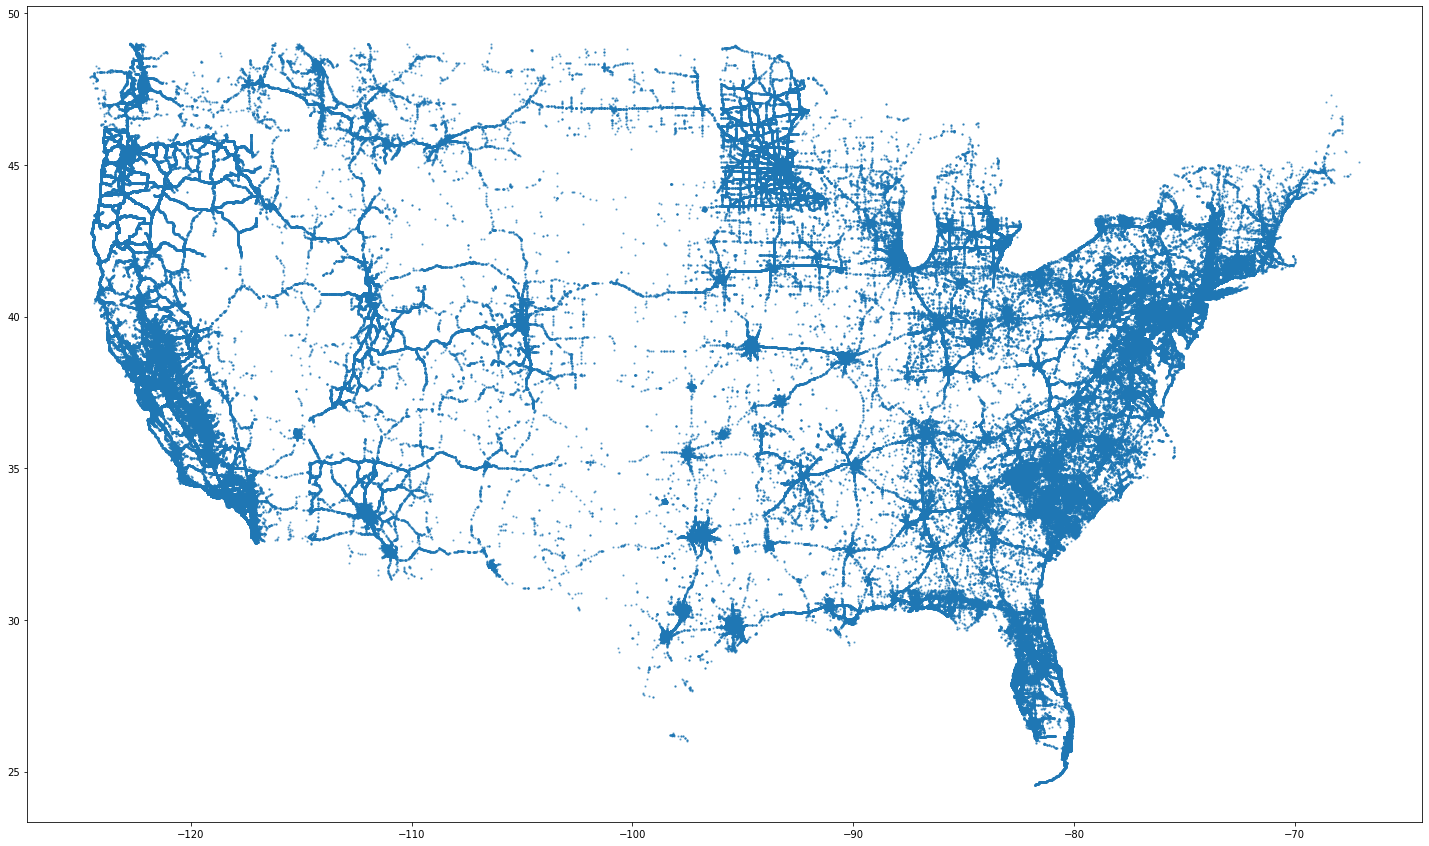

In [19]:
plt.figure(figsize=[25,15])
plt.scatter( df["Start_Lng"], df["Start_Lat"],s=1.5, alpha=.5)

## Value Counts

In [51]:
def create_histograms_lim(dataframe):
    for column in dataframe:
        if len(dataframe[column].value_counts()) > 10:
            dataframe[column].value_counts()[:10].plot(kind='bar')
        else:
            dataframe[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()

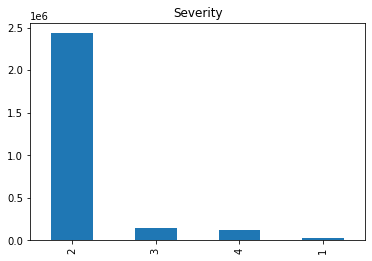

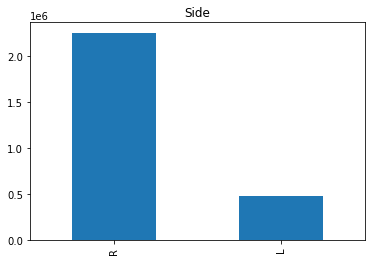

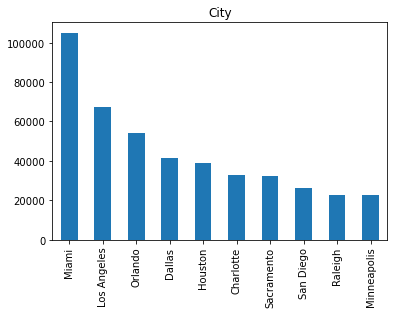

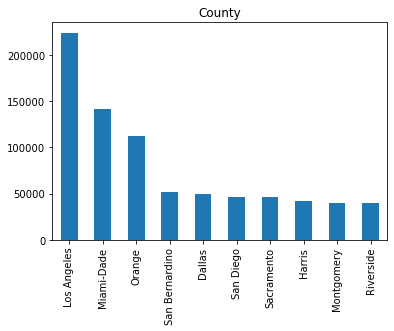

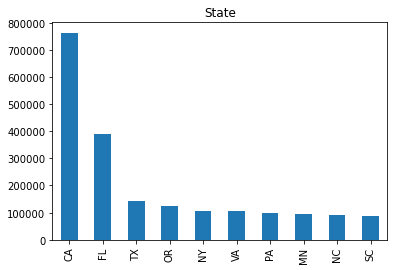

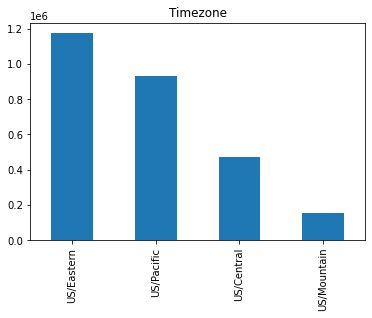

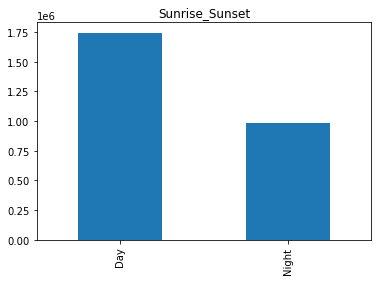

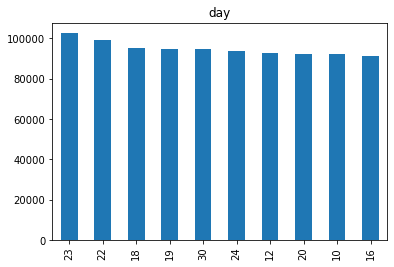

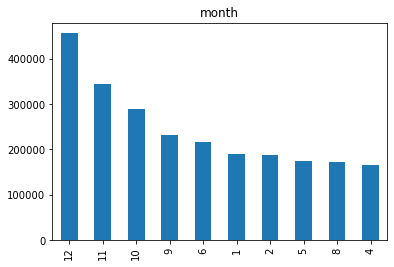

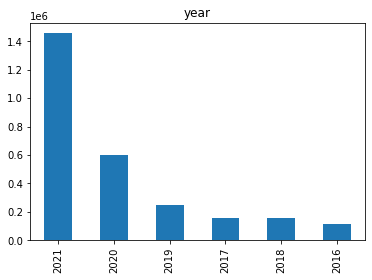

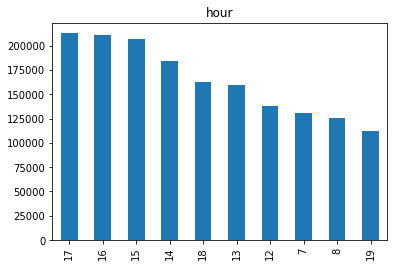

In [53]:
create_histograms_lim(df[cols])

In [70]:
def plot_histogram(df):
    for col in df.columns:
        if len(df[col].value_counts()) > 10:
            df = df[df[col].isin(df[col].value_counts().index[:10])]
        f = plt.figure(figsize=(15,10))
        ax = f.add_subplot(1,1,1)
        import seaborn as sns
        sns.histplot(data=df, ax=ax, stat="count", multiple="stack",
                     x=df[col], kde=False,
                     palette="pastel", hue="Severity",
                     element="bars", legend=True)
        ax.set_title("Seaborn Stacked Histogram")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

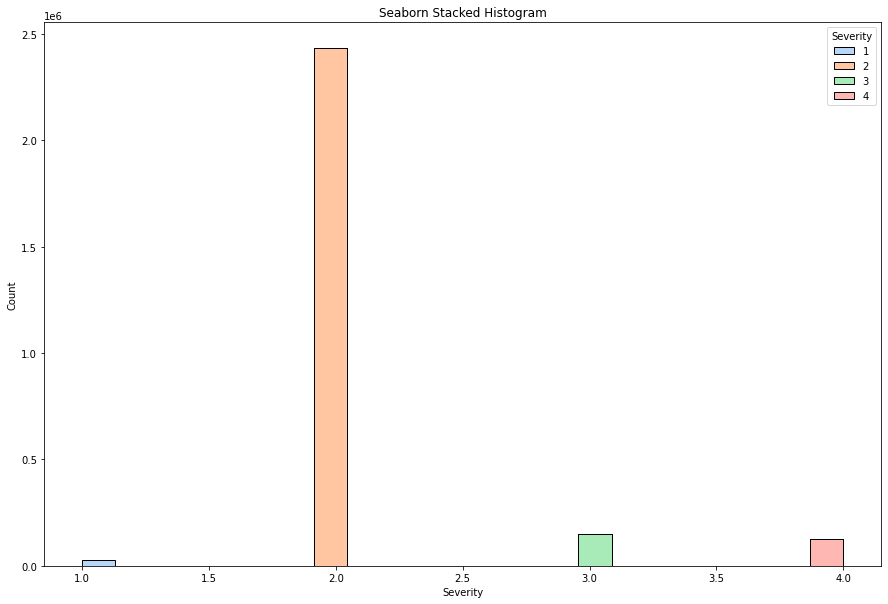

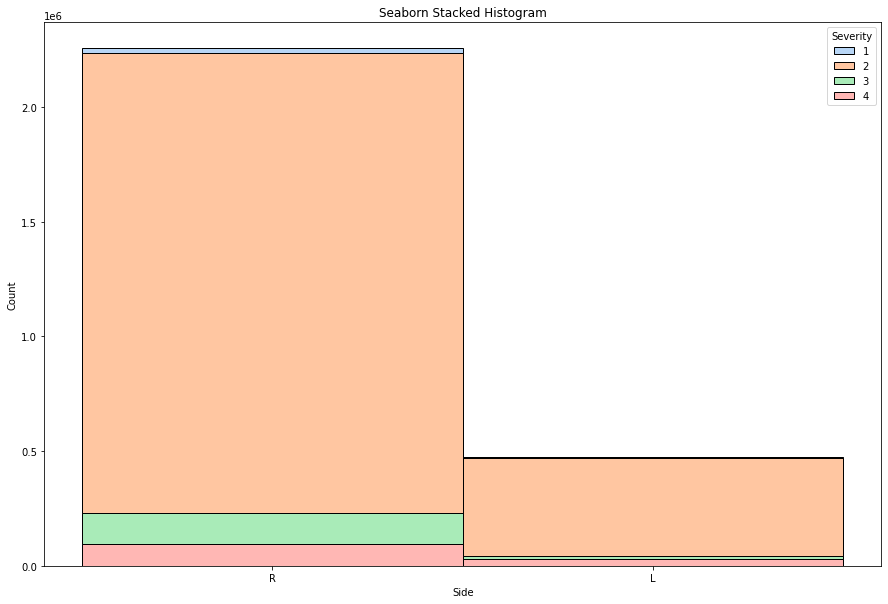

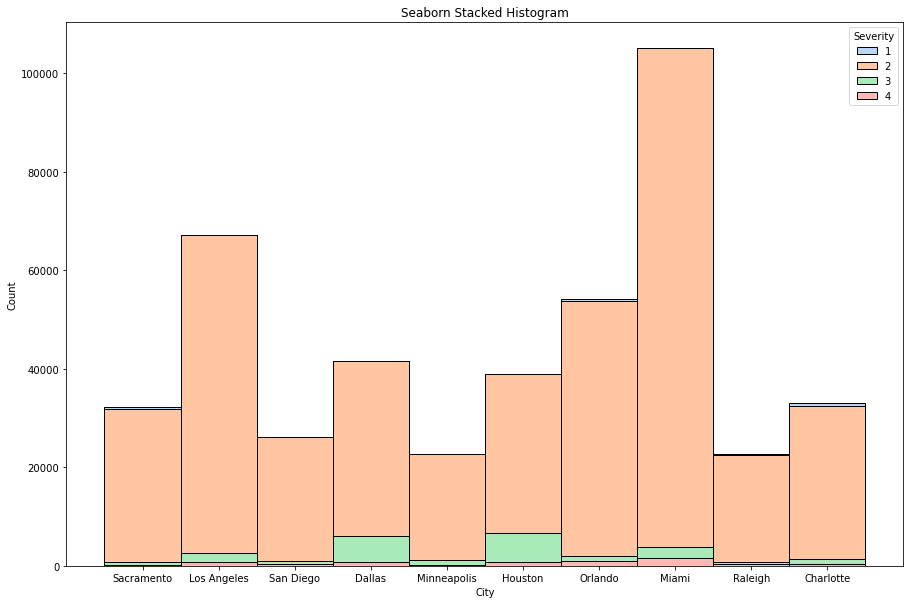

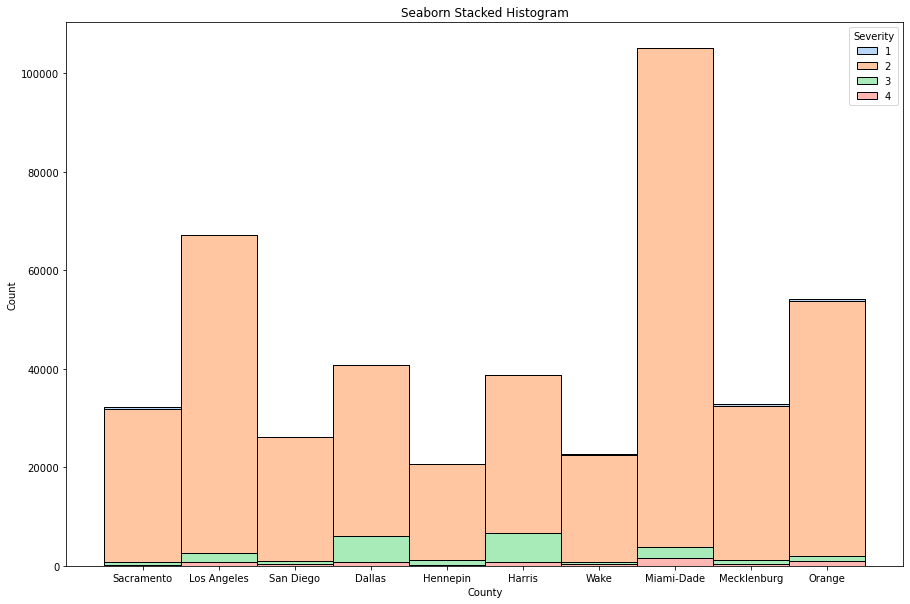

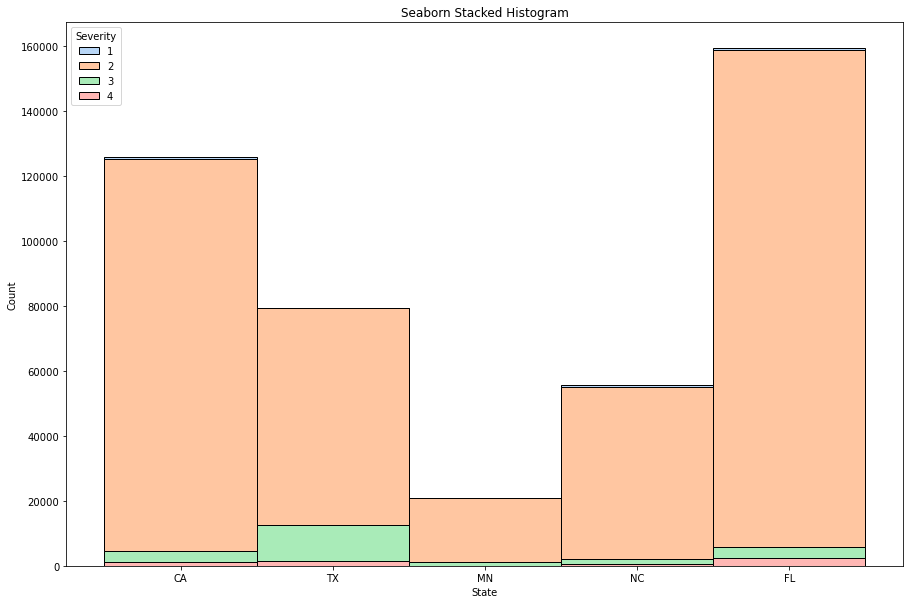

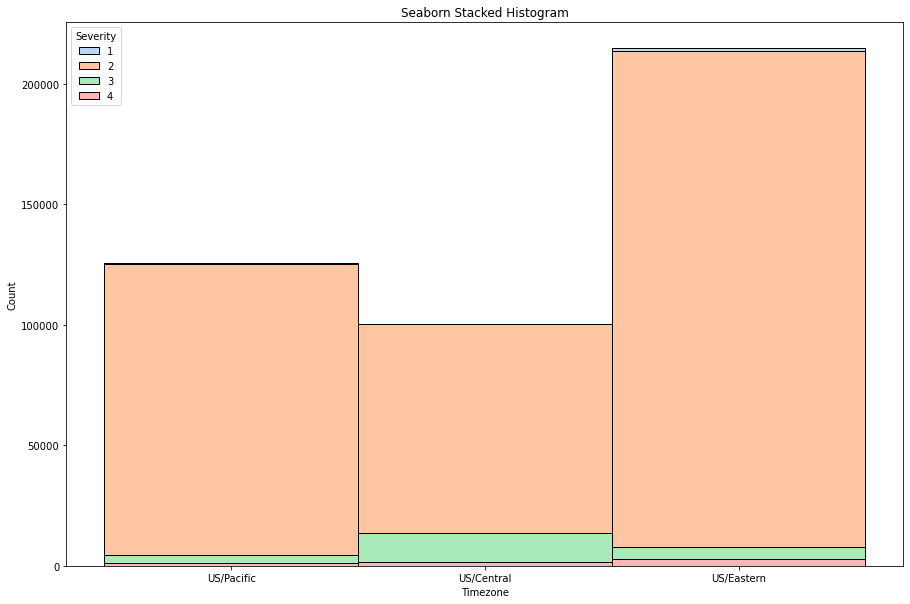

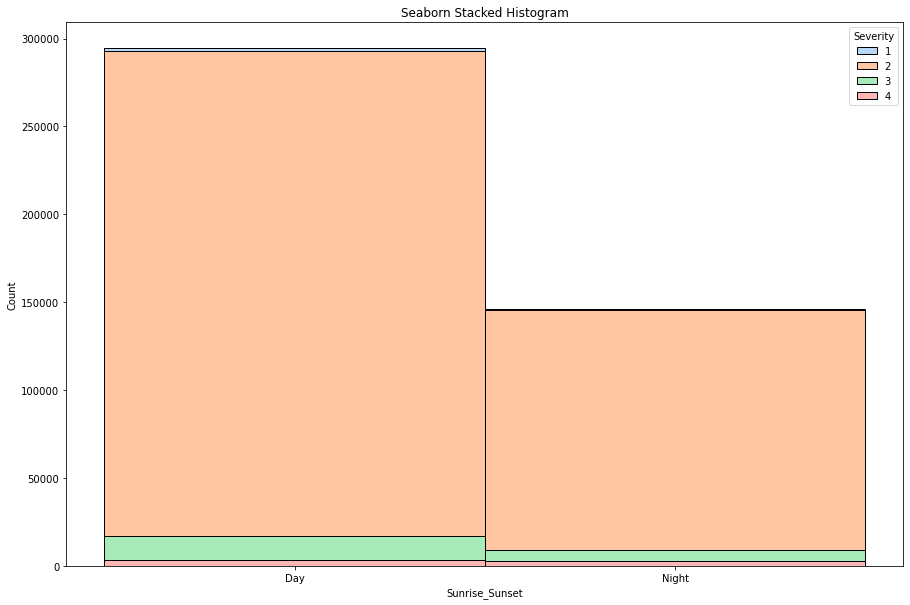

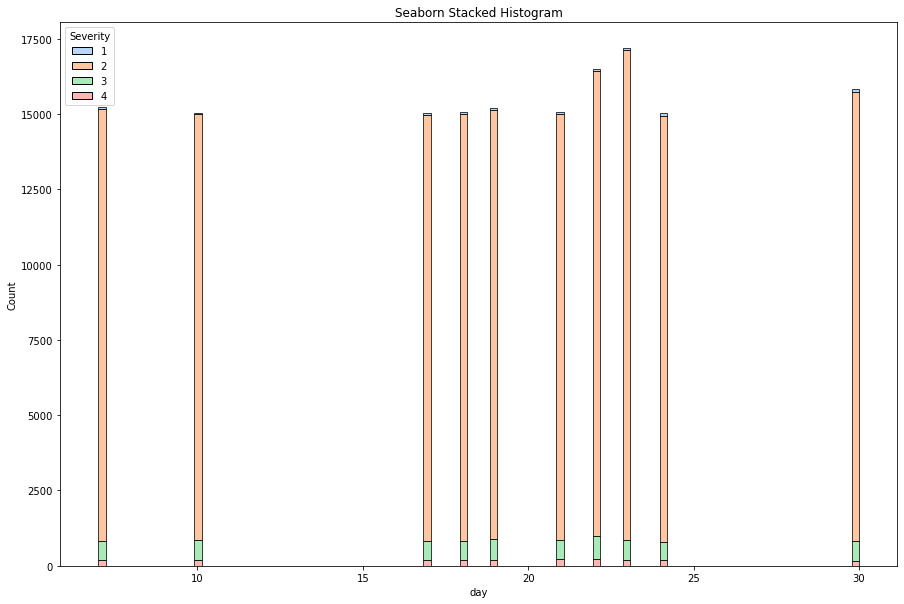

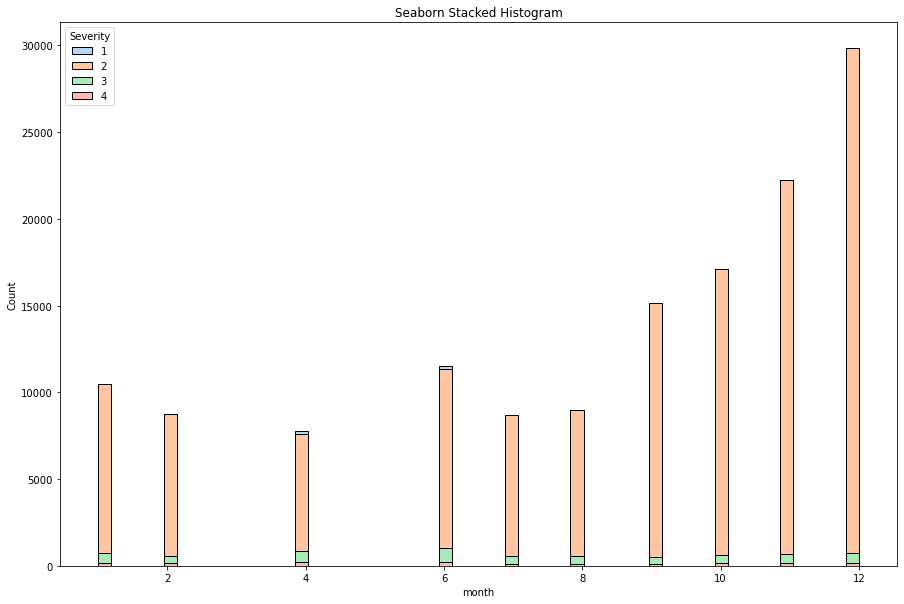

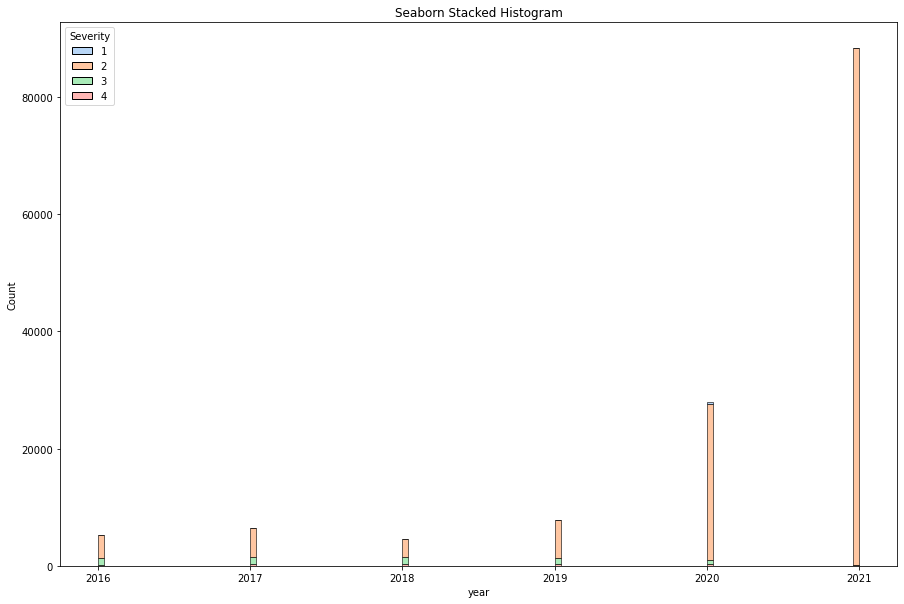

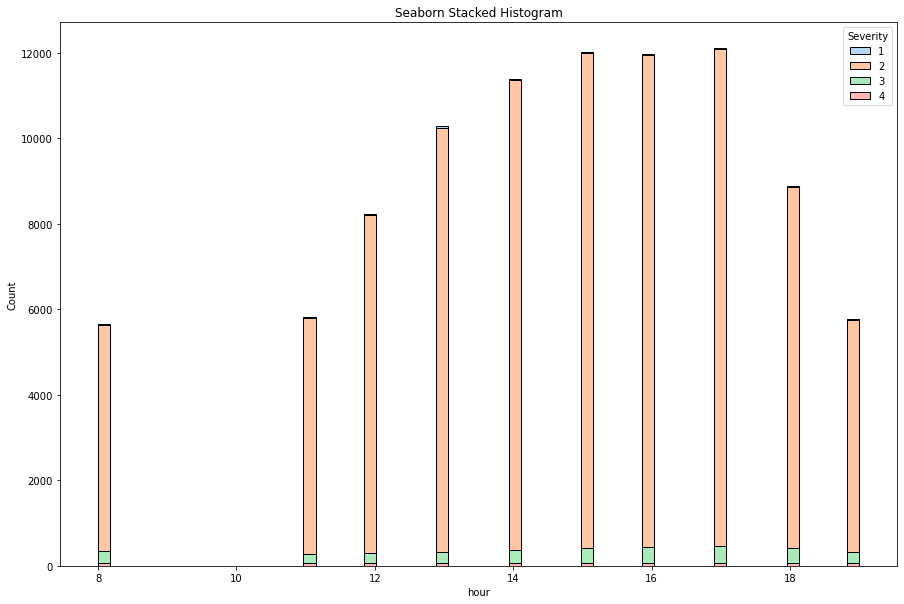

In [71]:
plot_histogram(df[cols])

In [121]:
df.groupby("Severity")['Side'].value_counts().unstack().T

Severity,1,2,3,4
Side,,,,
L,5363,427217,12944,28042
R,20136,2005406,135833,96109


In [120]:
df.groupby("Severity")['State'].value_counts().unstack().T

Severity,1,2,3,4
State,,,,
AL,110.0,17043.0,752.0,869.0
AR,11.0,8974.0,281.0,1148.0
AZ,5971.0,42100.0,2054.0,3661.0
CA,4919.0,730107.0,19437.0,8692.0
CO,425.0,11534.0,8494.0,3821.0
CT,4.0,24459.0,2086.0,2849.0
DC,34.0,7676.0,330.0,628.0
DE,7.0,3393.0,365.0,1024.0
FL,2744.0,367821.0,11187.0,9248.0


In [119]:
df.groupby("Severity")['Timezone'].value_counts().unstack().T

Severity,1,2,3,4
Timezone,,,,
US/Central,2575,395457,52588,20700
US/Eastern,8131,1031921,57324,77141
US/Mountain,7750,124000,12216,9963
US/Pacific,7043,881245,26649,16347


In [118]:
df.groupby("Severity")['day'].value_counts().unstack().T

Severity,1,2,3,4
day,,,,
1,927,70195,4574,3822
2,666,70306,4479,4019
3,769,72331,4957,3976
4,445,72162,4326,3746
5,766,74849,4966,4011
6,683,79374,4833,3938
7,680,80299,4695,4038
8,908,77549,4985,4019
9,801,78842,4795,4085


In [117]:
df.groupby("Severity")['month'].value_counts().unstack().T

Severity,1,2,3,4
month,,,,
1,NaN,168308.0,11270.0,9607.0
2,150.0,168584.0,9159.0,8975.0
3,4004.0,124920.0,13129.0,10080.0
4,7958.0,130022.0,17183.0,10756.0
5,6962.0,138326.0,18817.0,11016.0
6,6362.0,177643.0,21459.0,11457.0
7,11.0,134720.0,9363.0,8258.0
8,41.0,153376.0,9548.0,8641.0
9,8.0,213050.0,8298.0,9962.0


In [116]:
df.groupby("Severity")['year'].value_counts().unstack().T

Severity,1,2,3,4
year,,,,
2016,NaN,83523.0,20600.0,13057.0
2017,NaN,106121.0,29076.0,22051.0
2018,NaN,104120.0,28746.0,23133.0
2019,NaN,195624.0,29239.0,22573.0
2020,25499.0,509573.0,41116.0,21130.0
2021,NaN,1433662.0,NaN,22207.0


In [115]:
df.groupby("Severity")['hour'].value_counts().unstack().T

Severity,1,2,3,4
hour,,,,
0,269,57474,2849,4752
1,203,51008,2092,3060
2,202,47104,2176,3100
3,195,40380,2472,3209
4,269,43084,2483,3512
5,532,67662,4084,4600
6,868,94224,6217,5257
7,1177,115214,7897,5912
8,1264,110502,7999,5995


In [123]:
df.groupby("State")["Severity"].mean()

State
AL    2.126771
AR    2.246399
AZ    2.063306
CA    2.041803
CO    2.647236
CT    2.264644
DC    2.179049
DE    2.502401
FL    2.068898
GA    2.517801
IA    2.350833
ID    2.121320
IL    2.547030
IN    2.453642
KS    2.189113
KY    2.340958
LA    2.053507
MA    2.367444
MD    2.315180
ME    2.102914
MI    2.335659
MN    2.047524
MO    2.243695
MS    2.192502
MT    2.036630
NC    2.114179
ND    2.014468
NE    2.300284
NH    2.123774
NJ    2.234419
NM    2.379295
NV    2.222111
NY    2.211724
OH    2.484016
OK    2.181797
OR    2.073606
PA    2.202773
RI    2.155513
SC    2.050495
SD    2.455556
TN    2.079644
TX    2.184629
UT    2.073238
VA    2.174504
VT    2.392442
WA    2.303973
WI    2.833098
WV    2.182557
WY    2.603904
Name: Severity, dtype: float64